**Objectif**

Dans ce point de contrôle, nous allons travailler sur le jeu de données"Inclusion financière en Afrique" qui a été fourni dans le cadre du projet "Inclusion financière en Afrique" hébergé par la plateforme Zindi .

Description des données : L'ensemble de données contient des informations démographiques et les services financiers utilisés par environ 33 600 personnes en Afrique de l'Est. Le rôle du modèle ML est de prédire quels individus sont les plus susceptibles d'avoir ou d'utiliser un compte bancaire. 

Le terme d'inclusion financière signifie que les individus et les entreprises ont accès à des produits et services financiers utiles et abordables qui répondent à leurs besoins - transactions, paiements, épargne, crédit et assurance - et qui sont fournis de manière responsable et durable.

**Instructions**

1. Installer les paquets nécessaires

2. Importez vos données et effectuez la phase d'exploration des données de base

- Afficher des informations générales sur l'ensemble de données
- Créer un rapport de profilage pandas pour obtenir des informations sur le jeu de données
- Traiter les valeurs manquantes et corrompues
- Supprimer les doublons, s'ils existent
- Traiter les valeurs aberrantes, si elles existent
- Encoder les caractéristiques catégorielles

3. Sur la base de l'exploration des données précédente, former et tester un classificateur d'apprentissage automatique.

4. Créez une application streamlit (localement) et ajoutez des champs de saisie pour vos caractéristiques ainsi qu'un bouton de validation à la fin du formulaire.

5. Importez votre modèle d'apprentissage automatique dans l'application streamlit et commencez à faire des prédictions à partir des valeurs des caractéristiques fournies.

6. Déployez votre application sur le partage Streamlit :

- Créez un compte github et un compte streamlit.
- Créez un nouveau repo git
- Téléchargez votre code local dans le repo git nouvellement créé
- Connectez-vous à votre compte streamlit et déployez votre application à partir du repo git.
 

#### 1. Installer les paquets nécessaires

In [1]:
#1. Installer les paquets nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas_profiling
from sklearn.preprocessing import LabelEncoder, StandardScaler

C:\Users\DELL\AppData\Local\Temp\ipykernel_10924\590203693.py:9: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


#### 2. Importez vos données et effectuez la phase d'exploration des données de base

- Afficher des informations générales sur l'ensemble de données

In [2]:
#importation des données
data = pd.read_csv("Financial_inclusion_dataset.csv")

#Afficher les premières lignes du jeu de données
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
#Afficher les informations sur le jeu de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


- Créer un rapport de profilage pandas pour obtenir des informations sur le jeu de données

In [5]:
#Générer un rapport d'analyse exploratoire des données
profile = pandas_profiling.ProfileReport(data)

#Afficher le rapport
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 22.82it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- Traiter les valeurs manquantes et corrompues

In [4]:
#Vérification des valeurs manquantes
data.isnull().sum() * 100 / len(data)

country                   0.0
year                      0.0
uniqueid                  0.0
bank_account              0.0
location_type             0.0
cellphone_access          0.0
household_size            0.0
age_of_respondent         0.0
gender_of_respondent      0.0
relationship_with_head    0.0
marital_status            0.0
education_level           0.0
job_type                  0.0
dtype: float64

- Traiter les valeurs aberrantes, si elles existent

In [5]:
# Passons maintenant aux valeurs aberrantes dans les colonnes numériques de mes données

# Initialiser une liste pour stocker les noms de colonnes avec des valeurs aberrantes

colonnes_aberrantes = []

def valeurs_aberrantes(df, col_numeriques):
    # Définir le seuil pour identifier les valeurs aberrantes en fonction du score Z
    seuil_z = 3
    # Boucle à travers chaque colonne numérique
    for colonne in col_numeriques:
        valeur_aberrante = []
        nombre_valeur_aberrante = 0 # Initialize to 0
        pourcentage_valeur_aberrante = 0.0 # Initialize to 0.0
        # Calculer la moyenne et l'écart-type de la colonne actuelle
        moyenne = df[colonne].mean()
        ecart_type = df[colonne].std()

        # Calculer les scores Z pour la colonne actuelle
        scores_z = (df[colonne] - moyenne) / ecart_type

        # Identifier les valeurs aberrantes pour la colonne actuelle
        valeurs_aberrantes = df[abs(scores_z) > seuil_z]

        # Afficher les valeurs aberrantes pour la colonne actuelle
        if not valeurs_aberrantes.empty:
             colonnes_aberrantes.append(colonne)
             print(f"Voici les valeurs aberrantes dans la colonne '{colonne}' avec zscore = 3 :")
             for index, valeur in valeurs_aberrantes[colonne].items():
                valeur_aberrante.append(valeur)
                nombre_valeur_aberrante = len(valeur_aberrante)
                pourcentage_valeur_aberrante = (nombre_valeur_aberrante / len(df)) * 100
                # print(f"Ligne: {index}, Valeur: {valeur}")
        print(f"Le nombre de valeurs aberrantes de la colonne {colonne} est {nombre_valeur_aberrante}")
        print(f"Le pourcentage de valeurs aberrantes de la colonne {colonne} est {pourcentage_valeur_aberrante:.2f}%")
        print()


    print(f"\nIl y a {len(colonnes_aberrantes)} colonnes avec des valeurs aberrantes : {colonnes_aberrantes}")


#Application sur notre base de données
valeurs_aberrantes(data, data.select_dtypes(include=['int64', 'float64']))

Le nombre de valeurs aberrantes de la colonne year est 0
Le pourcentage de valeurs aberrantes de la colonne year est 0.00%

Voici les valeurs aberrantes dans la colonne 'household_size' avec zscore = 3 :
Le nombre de valeurs aberrantes de la colonne household_size est 191
Le pourcentage de valeurs aberrantes de la colonne household_size est 0.81%

Voici les valeurs aberrantes dans la colonne 'age_of_respondent' avec zscore = 3 :
Le nombre de valeurs aberrantes de la colonne age_of_respondent est 101
Le pourcentage de valeurs aberrantes de la colonne age_of_respondent est 0.43%


Il y a 2 colonnes avec des valeurs aberrantes : ['household_size', 'age_of_respondent']


- Encoder les caractéristiques catégorielles

In [3]:
# Découpagde des données
col_numeriques = data.select_dtypes(include=['int64', 'float64'])
col_categoriques = data.select_dtypes(include=['object']).drop(columns=['uniqueid']) # Suppression de la colonne 'uniqueid' qui n'est pas catégorique pertinente

In [4]:
#le nombre de valeurs uniques dans chaque colonne catégorique
for col in col_categoriques.columns:
    print(f"{col}: {col_categoriques[col].unique()} ({len(col_categoriques[col].unique())} valeurs uniques)")
    print()

country: ['Kenya' 'Rwanda' 'Tanzania' 'Uganda'] (4 valeurs uniques)

bank_account: ['Yes' 'No'] (2 valeurs uniques)

location_type: ['Rural' 'Urban'] (2 valeurs uniques)

cellphone_access: ['Yes' 'No'] (2 valeurs uniques)

gender_of_respondent: ['Female' 'Male'] (2 valeurs uniques)

relationship_with_head: ['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives'] (6 valeurs uniques)

marital_status: ['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know'] (5 valeurs uniques)

education_level: ['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA'] (6 valeurs uniques)

job_type: ['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income'] (10 valeurs uniques)



In [5]:
df = data.copy()

#Suppression de la colonne 'user_id' qui n'est pas utile pour la modélisation
df_1 = df.drop('uniqueid', axis=1)
#encodage par label encoding
label_encoder = LabelEncoder()
for col in df.select_dtypes(exclude='number').columns:
    df[col] = label_encoder.fit_transform(df[col])  

#Affichage des premières lignes du dataframe après traitement
df.head()
print(df.shape)

(23524, 13)


#### 3. Sur la base de l'exploration des données précédente, former et tester un classificateur d'apprentissage automatique.

In [6]:
# Déterminons les colonnes corrélées avec la cible
correlation_colonnes = df.select_dtypes(include='number').corr()

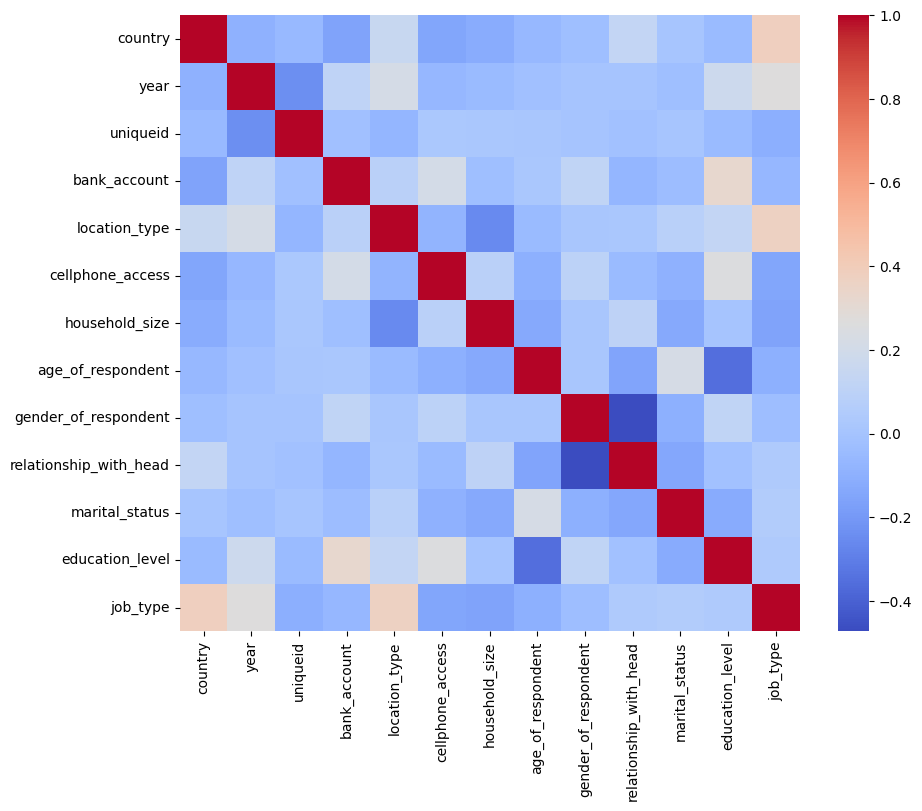

In [7]:
# visualisation heatmap des correlations
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_colonnes, annot=False, cmap='coolwarm')
plt.show()

<Axes: >

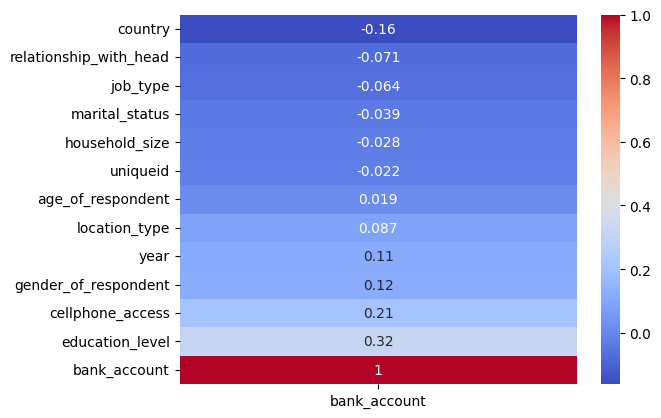

In [8]:
# Correlation avec la cible
correlation_cible_triee = correlation_colonnes['bank_account'].sort_values(ascending=True)

# Sélectionnons les colonnes dans l'ordre trié
colonnes_triees = correlation_cible_triee.index.tolist()

sns.heatmap(correlation_colonnes.loc[colonnes_triees, ['bank_account']], annot=True, cmap='coolwarm')

In [9]:
def get_correlated_columns(corr_df, target='bank_account', threshold=0.1, absolute=True):
    """
    Retourne une Series des colonnes dont la corrélation (absolue par défaut)
    avec `target` est >= threshold, triée par valeur décroissante.
    """
    if target not in corr_df.columns and target not in corr_df.index:
        raise ValueError(f"{target} introuvable dans le DataFrame de corrélation.")
    s = corr_df[target] if target in corr_df.columns else corr_df.loc[target]
    if absolute:
        s = s.abs()
    s = s.drop(labels=[target], errors='ignore')
    return s[s >= threshold].sort_values(ascending=False)

# Exemple d'utilisation (définir votre seuil)
seuil = 0.05
cols_correl = get_correlated_columns(correlation_colonnes, target='bank_account', threshold=seuil)
print(cols_correl)
# si vous voulez juste la liste des noms :
liste_cols = list(cols_correl.index)

education_level           0.323768
cellphone_access          0.209669
country                   0.161362
gender_of_respondent      0.117234
year                      0.112318
location_type             0.087288
relationship_with_head    0.070853
job_type                  0.064171
Name: bank_account, dtype: float64


In [10]:
#variables explicatives 
features = liste_cols

#variable cible
target = 'bank_account'

In [11]:
X = df[features]
y = df[target]

In [12]:
# Découpage des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
#Mise à l'Échelle (Scaling)
# Initialisation du scaler
scaler = StandardScaler()

# Apprentissage de la mise à l'échelle sur l'ensemble d'apprentissage et transformation
X_train_scaled = scaler.fit_transform(X_train)

# Transformation de l'ensemble de test
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.utils.validation import check_is_fitted

# Définir et entraîner le modèle
model = XGBClassifier(
	eval_metric='logloss',
	n_estimators=100,
	max_depth=6,
	n_jobs=-1,
	random_state=42
)

# Entraîner le modèle
model.fit(X_train_scaled, y_train)

# Prédictions
y_pred = model.predict(X_test_scaled)
y_probs = model.predict_proba(X_test_scaled)[:, 1]  # probas pour AUC

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_probs)

# Affichage
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")

# Matrice de confusion
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))

# Rapport détaillé
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


Accuracy: 0.8859
Precision: 0.6658
Recall: 0.3792
F1-score: 0.4832
AUC-ROC: 0.8636

Matrice de confusion :
[[3917  126]
 [ 411  251]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4043
           1       0.67      0.38      0.48       662

    accuracy                           0.89      4705
   macro avg       0.79      0.67      0.71      4705
weighted avg       0.87      0.89      0.87      4705



#### 4. Créez une application streamlit (localement)

In [74]:
for col in data[features].columns:
    # col is the column name (string); get the Series and call .unique()
    print(f"Unique values in column '{col}':")
    print(data[col].unique())
    print()

Unique values in column 'education_level':
['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA']

Unique values in column 'cellphone_access':
['Yes' 'No']

Unique values in column 'country':
['Kenya' 'Rwanda' 'Tanzania' 'Uganda']

Unique values in column 'gender_of_respondent':
['Female' 'Male']

Unique values in column 'year':
[2018 2016 2017]

Unique values in column 'location_type':
['Rural' 'Urban']

Unique values in column 'relationship_with_head':
['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']

Unique values in column 'job_type':
['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income']



#### 5. Ajoutez des champs de saisie pour vos caractéristiques et un bouton de validation à la fin du formulaire.